In [1]:
"""
CS353 - Machine Learning Lab
Lab1
Section 2
Name: Hardik L Harti
Roll number : 181CO220
Date : 02.02.2021
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import tree
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
df=pd.read_csv(r'C:\Users\hardi\Desktop\titanic.csv')
df["Embarked"] = df["Embarked"].fillna("NA")
df = df.dropna()
p_df = df.copy()
le = preprocessing.LabelEncoder()
p_df.Sex = le.fit_transform(p_df.Sex)
p_df.Embarked = le.fit_transform(p_df.Embarked)
p_df = p_df.drop(['Name','Ticket','Cabin'],axis=1)

X = p_df.drop(['Survived'], axis=1).values
y = p_df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
#df.info()


In [3]:
#id3 classification using information gain
id3 = tree.DecisionTreeClassifier(criterion='entropy')
id3 = id3.fit(X_train, y_train)

#cart tree classification using gini index
cart = tree.DecisionTreeClassifier(criterion='gini')
cart = cart.fit(X_train, y_train)

[Text(115.0875, 209.6742857142857, 'X[2] <= 0.5\nentropy = 0.933\nsamples = 129\nvalue = [45, 84]'),
 Text(69.75, 194.14285714285714, 'X[6] <= 11.488\nentropy = 0.396\nsamples = 64\nvalue = [5, 59]'),
 Text(41.85, 178.61142857142858, 'X[5] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(27.900000000000002, 163.07999999999998, 'X[3] <= 45.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(13.950000000000001, 147.54857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(41.85, 147.54857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(55.800000000000004, 163.07999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(97.65, 178.61142857142858, 'X[3] <= 3.0\nentropy = 0.286\nsamples = 60\nvalue = [3, 57]'),
 Text(83.7, 163.07999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 163.07999999999998, 'X[0] <= 502.0\nentropy = 0.214\nsamples = 59\nvalue = [2, 57]'),
 Text(97.65, 147.54857142857142, 'X[0] <= 4

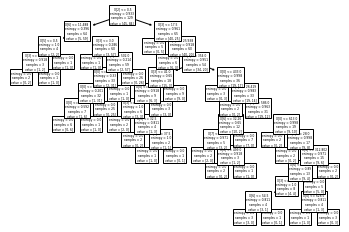

In [4]:
#plotting tree based on id3
tree.plot_tree(id3)


[Text(117.18, 209.07692307692307, 'X[2] <= 0.5\ngini = 0.454\nsamples = 129\nvalue = [45, 84]'),
 Text(27.9, 192.35076923076923, 'X[3] <= 3.0\ngini = 0.144\nsamples = 64\nvalue = [5, 59]'),
 Text(16.740000000000002, 175.62461538461537, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(39.06, 175.62461538461537, 'X[6] <= 10.481\ngini = 0.119\nsamples = 63\nvalue = [4, 59]'),
 Text(27.9, 158.89846153846153, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(50.22, 158.89846153846153, 'X[6] <= 11.488\ngini = 0.092\nsamples = 62\nvalue = [3, 59]'),
 Text(22.32, 142.1723076923077, 'X[0] <= 645.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(11.16, 125.44615384615385, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(33.480000000000004, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(78.12, 142.1723076923077, 'X[0] <= 186.5\ngini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(55.8, 125.44615384615385, 'X[0] <= 165.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 T

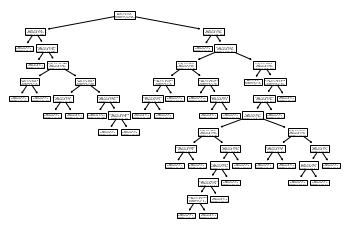

In [5]:
#plotting tree based on cart
tree.plot_tree(cart)

In [6]:
#prediction of the values for test dataset
y_pred1=id3.predict(X_test)
y_pred2=cart.predict(X_test)

[]

<Figure size 432x288 with 0 Axes>

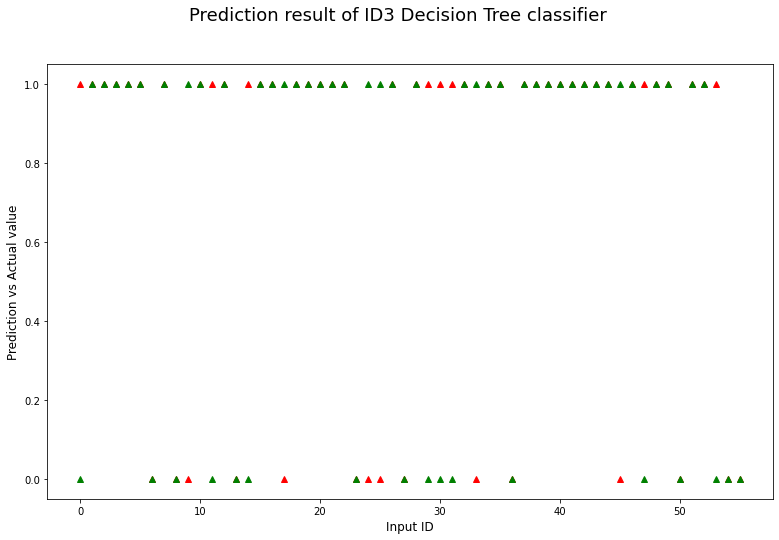

In [7]:
plt.clf()
plt.figure(figsize=(13,8))

# Red coloured plots are the actual values that don't match with prediction (green plots). Note that green plots are plotted over red ones, hence correct predictions are hidden

plt.plot(np.arange(0,len(y_test),1), y_test, 'r^', np.arange(0,len(y_test),1), y_pred1, 'g^')
plt.xlabel('Input ID', fontsize=12)
plt.ylabel('Prediction vs Actual value', fontsize=12)
plt.suptitle('Prediction result of ID3 Decision Tree classifier', fontsize = 18)

# Saving the obatined plot
plt.savefig('ID3 Decision Tree Prediction.png')

plt.plot()

[]

<Figure size 432x288 with 0 Axes>

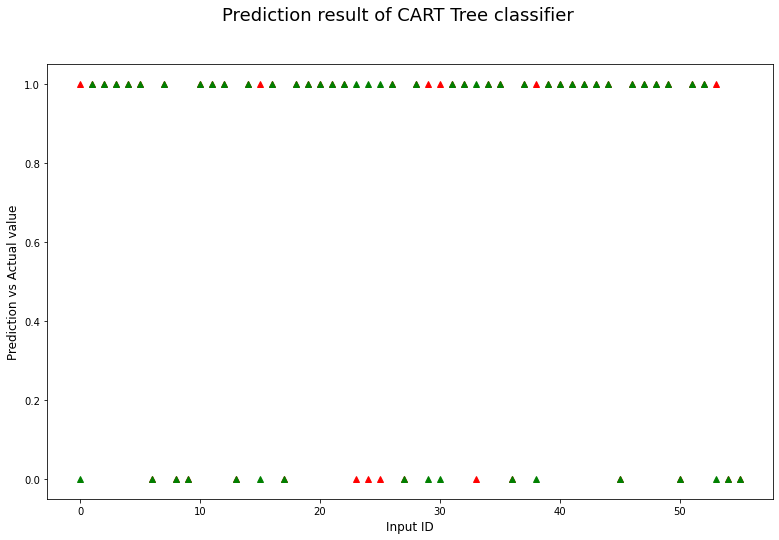

In [8]:
plt.clf()
plt.figure(figsize=(13,8))

# Red coloured plots are the actual values that don't match with prediction (green plots). Note that green plots are plotted over red ones, hence correct predictions are hidden

plt.plot(np.arange(0,len(y_test),1), y_test, 'r^', np.arange(0,len(y_test),1), y_pred2, 'g^')
plt.xlabel('Input ID', fontsize=12)
plt.ylabel('Prediction vs Actual value', fontsize=12)
plt.suptitle('Prediction result of CART Tree classifier', fontsize = 18)

# Saving the obatined plot
plt.savefig('CART Tree Prediction.png')

plt.plot()

In [9]:
#Calculating accuracy scores and reports for comparison
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('ID3 classifier')
print('Accuracy by id3 ', accuracy_score(y_true=y_test, y_pred=y_pred1))
print('Report',classification_report(y_test, y_pred1))

print('\nCART Tree')
print('Accuracy by cart tree ', accuracy_score(y_true=y_test, y_pred=y_pred2))
print('Report',classification_report(y_test, y_pred2))

ID3 classifier
Accuracy by id3  0.75
Report               precision    recall  f1-score   support

           0       0.53      0.60      0.56        15
           1       0.85      0.80      0.83        41

    accuracy                           0.75        56
   macro avg       0.69      0.70      0.69        56
weighted avg       0.76      0.75      0.75        56


CART Tree
Accuracy by cart tree  0.8214285714285714
Report               precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.90      0.85      0.88        41

    accuracy                           0.82        56
   macro avg       0.77      0.79      0.78        56
weighted avg       0.83      0.82      0.82        56



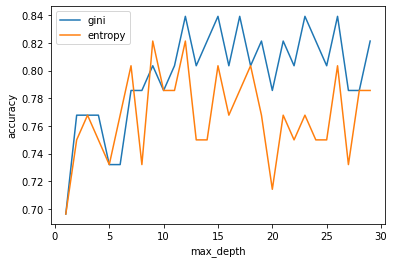

In [10]:
#Pruning
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

# We can change the max depth after observing the graph

In [57]:
#id3 classification using information gain
id3 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=7)
id3 = id3.fit(X_train, y_train)

#cart tree classification using gini index
cart = tree.DecisionTreeClassifier(criterion='gini',max_depth=15)
cart = cart.fit(X_train, y_train)

[Text(140.96842105263158, 203.85, 'X[2] <= 0.5\nentropy = 0.933\nsamples = 129\nvalue = [45, 84]'),
 Text(88.10526315789474, 176.67000000000002, 'X[6] <= 11.488\nentropy = 0.396\nsamples = 64\nvalue = [5, 59]'),
 Text(52.863157894736844, 149.49, 'X[1] <= 2.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(35.242105263157896, 122.31, 'X[3] <= 45.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(17.621052631578948, 95.13, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(52.863157894736844, 95.13, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(70.48421052631579, 122.31, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(123.34736842105264, 149.49, 'X[3] <= 3.0\nentropy = 0.286\nsamples = 60\nvalue = [3, 57]'),
 Text(105.72631578947369, 122.31, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(140.96842105263158, 122.31, 'X[0] <= 502.0\nentropy = 0.214\nsamples = 59\nvalue = [2, 57]'),
 Text(123.34736842105264, 95.13, 'X[0] <= 498.0\nentropy = 0.33\nsamples = 33\

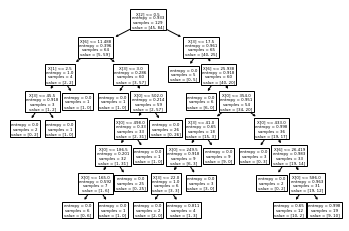

In [58]:
#plotting tree based on id3
tree.plot_tree(id3)


[Text(113.59285714285714, 209.07692307692307, 'X[2] <= 0.5\ngini = 0.454\nsamples = 129\nvalue = [45, 84]'),
 Text(29.892857142857142, 192.35076923076923, 'X[3] <= 3.0\ngini = 0.144\nsamples = 64\nvalue = [5, 59]'),
 Text(17.935714285714287, 175.62461538461537, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(41.85, 175.62461538461537, 'X[6] <= 10.481\ngini = 0.119\nsamples = 63\nvalue = [4, 59]'),
 Text(29.892857142857142, 158.89846153846153, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(53.80714285714286, 158.89846153846153, 'X[6] <= 11.488\ngini = 0.092\nsamples = 62\nvalue = [3, 59]'),
 Text(23.914285714285715, 142.1723076923077, 'X[3] <= 45.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(11.957142857142857, 125.44615384615385, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(35.871428571428574, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(83.7, 142.1723076923077, 'X[0] <= 186.5\ngini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(59.7857142857

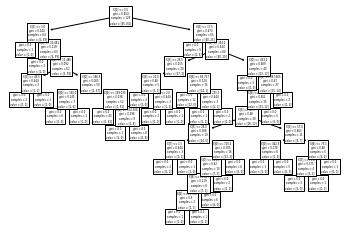

In [59]:
#plotting tree based on id3
tree.plot_tree(cart)

In [60]:
#prediction of the values for test dataset
y_pred1=id3.predict(X_test)
y_pred2=cart.predict(X_test)

In [61]:
#Calculating accuracy scores and reports for comparison after pruning
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('ID3 classifier')
print('Accuracy by id3 ', accuracy_score(y_true=y_test, y_pred=y_pred1))
print('Report',classification_report(y_test, y_pred1))

print('\nCART Tree')
print('Accuracy by cart tree ', accuracy_score(y_true=y_test, y_pred=y_pred2))
print('Report',classification_report(y_test, y_pred2))

ID3 classifier
Accuracy by id3  0.8392857142857143
Report               precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.88      0.90      0.89        41

    accuracy                           0.84        56
   macro avg       0.80      0.78      0.79        56
weighted avg       0.84      0.84      0.84        56


CART Tree
Accuracy by cart tree  0.8035714285714286
Report               precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.88      0.85      0.86        41

    accuracy                           0.80        56
   macro avg       0.75      0.76      0.75        56
weighted avg       0.81      0.80      0.81        56



# New accuracies after pruning

[]

<Figure size 432x288 with 0 Axes>

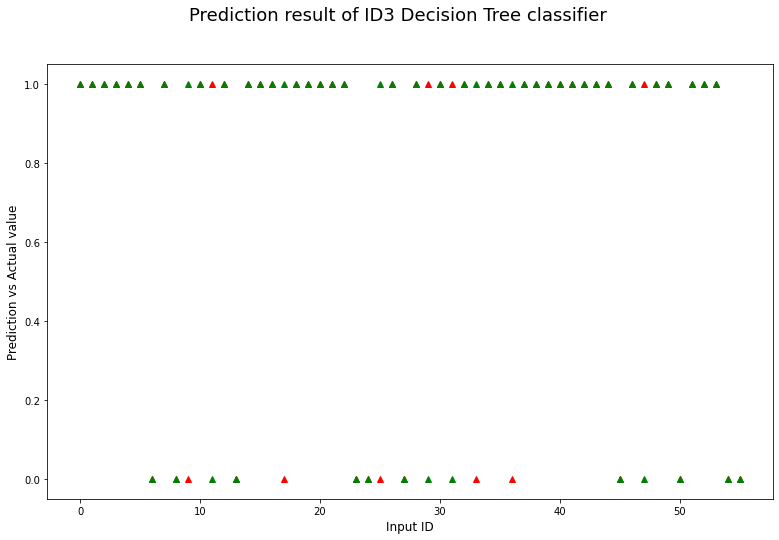

In [62]:
plt.clf()
plt.figure(figsize=(13,8))

# Red coloured plots are the actual values that don't match with prediction (green plots). Note that green plots are plotted over red ones, hence correct predictions are hidden

plt.plot(np.arange(0,len(y_test),1), y_test, 'r^', np.arange(0,len(y_test),1), y_pred1, 'g^')
plt.xlabel('Input ID', fontsize=12)
plt.ylabel('Prediction vs Actual value', fontsize=12)
plt.suptitle('Prediction result of ID3 Decision Tree classifier', fontsize = 18)

# Saving the obatined plot
plt.savefig('ID3 Decision Tree Prediction.png')

plt.plot()

[]

<Figure size 432x288 with 0 Axes>

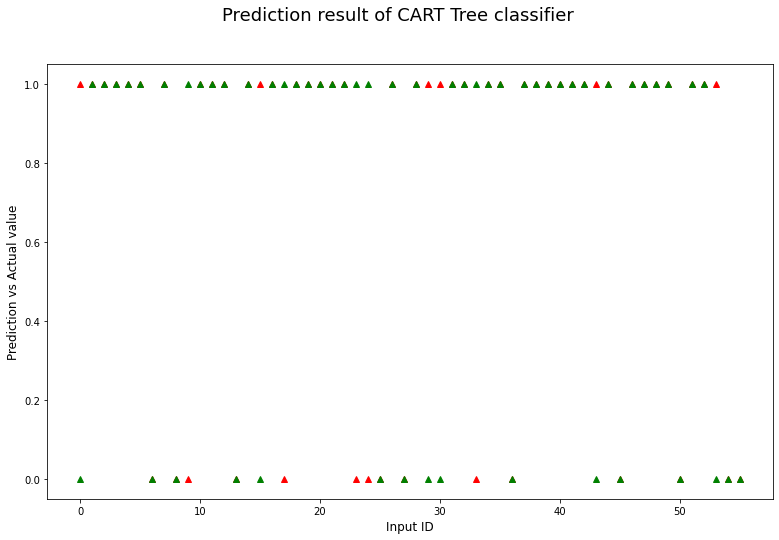

In [63]:
plt.clf()
plt.figure(figsize=(13,8))

# Red coloured plots are the actual values that don't match with prediction (green plots). Note that green plots are plotted over red ones, hence correct predictions are hidden

plt.plot(np.arange(0,len(y_test),1), y_test, 'r^', np.arange(0,len(y_test),1), y_pred2, 'g^')
plt.xlabel('Input ID', fontsize=12)
plt.ylabel('Prediction vs Actual value', fontsize=12)
plt.suptitle('Prediction result of CART Tree classifier', fontsize = 18)

# Saving the obatined plot
plt.savefig('CART Tree Prediction.png')

plt.plot()